In [10]:
import torch
from torch import nn

In [11]:
import torch
from torch import nn
import torchvision
from torchvision import datasets,transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [12]:
#datasets
train_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None)
test_data=datasets.FashionMNIST(
    root="data",
    train=False,        
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None)

In [13]:
class_name=train_data.classes

Image shape:torch.Size([1, 28, 28])


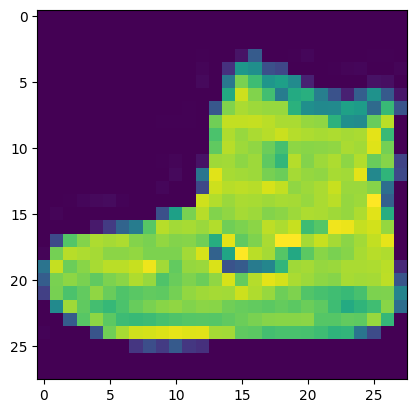

In [14]:
image,label=train_data[0]
print(f"Image shape:{image.shape}")
plt.imshow(image.squeeze())

In [15]:
#Create CNN 
class FashionMnist(nn.Module):
    def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
        super().__init__()
        self.Conv_block1=nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1
                      ),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
             )
        self.Conv_block2=nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier_layer=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )
    def forward(self,x):
        x=self.Conv_block1(x)
        # print(x.shape)
        x=self.Conv_block2(x)
        # print(x.shape)
        x=self.classifier_layer(x)
        return x



In [16]:
device="cuda" if torch.cuda.is_available() else "cpu"

In [17]:
torch.manual_seed(42)
model=FashionMnist(input_shape=1,
                   hidden_units=10,
                   output_shape=len(class_name)).to(device)


In [18]:
torch.manual_seed(42)
images=torch.randn(size=(32,3,64,64))
test_img=image[0]
print(f"Image batch shape:{image.shape}")
print(f"single image shape:{test_img.shape}")
# print(f"Test image shape:{test_img}")
image.shape

Image batch shape:torch.Size([1, 28, 28])
single image shape:torch.Size([28, 28])


torch.Size([1, 28, 28])

In [19]:
# Convert the grayscale image to a 3-channel image
test_img_3 = test_img.unsqueeze(0).repeat(3, 1, 1)  # Shape becomes [3, 28, 28]
print(f"3-channel test image shape: {test_img_3.shape}")

3-channel test image shape: torch.Size([3, 28, 28])


In [20]:
conv_layer=nn.Conv2d(in_channels=3,
                     out_channels=10,kernel_size=10,
                     stride=1,
                     padding=0
                     )

In [21]:
output=conv_layer(test_img_3)
output


tensor([[[-0.0281, -0.0280, -0.0276,  ..., -0.2104, -0.1809, -0.1612],
         [-0.0280, -0.0279, -0.0273,  ..., -0.1503, -0.1148, -0.2766],
         [-0.0276, -0.0277, -0.0277,  ...,  0.0346, -0.0345, -0.2514],
         ...,
         [ 0.1226,  0.0781,  0.0411,  ..., -0.1120, -0.1317, -0.3578],
         [ 0.0273,  0.0194,  0.0620,  ...,  0.0670, -0.0164, -0.2318],
         [-0.0389, -0.0890, -0.0725,  ..., -0.1271, -0.1321, -0.2362]],

        [[ 0.0394,  0.0393,  0.0392,  ...,  0.1538,  0.1500, -0.0141],
         [ 0.0392,  0.0394,  0.0398,  ...,  0.1487,  0.0768,  0.1390],
         [ 0.0390,  0.0385,  0.0386,  ...,  0.3481,  0.3912,  0.0585],
         ...,
         [ 0.0907,  0.1374,  0.1528,  ..., -0.0335,  0.0297, -0.0755],
         [ 0.0606,  0.0045,  0.0857,  ...,  0.1110,  0.0563, -0.1310],
         [-0.1090, -0.0627,  0.0208,  ...,  0.0611,  0.0437, -0.0164]],

        [[ 0.0404,  0.0401,  0.0401,  ..., -0.6857, -0.6027, -0.3876],
         [ 0.0406,  0.0407,  0.0399,  ..., -0

In [22]:
test_img.shape

torch.Size([28, 28])

In [23]:
# From shape [28, 28] to [1, 28, 28]:
test_img_with_channel = test_img.unsqueeze(0)

# Now repeat along the channel dimension to get 3 channels:
test_img_3channel = test_img_with_channel.repeat(1, 3, 1, 1)  # Now shape [1, 3, 28, 28]


conv_output = conv_layer(test_img_3channel)
print(f"Shape after going through conv_layer(): {conv_output.shape}")

Shape after going through conv_layer(): torch.Size([1, 10, 19, 19])


In [24]:
test_img_3channel.shape

torch.Size([1, 3, 28, 28])

In [25]:
# Print out original image shape without unsqueezed dimension
print(f"Test image original shape: {test_img_3channel. shape}")
# print(f"Test image with unsqueezed dimension: {test_img_3channel.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_img_3channel)
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print (f"Shape after going through conv_layer() and max_pool_layer() : {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([1, 3, 28, 28])
Shape after going through conv_layer(): torch.Size([1, 10, 19, 19])
Shape after going through conv_layer() and max_pool_layer() : torch.Size([1, 10, 9, 9])


In [26]:
rand_image_tensor = torch.randn(size=(1,28,28))  
# shape = [1, 28, 28]


In [27]:
rand_image_tensor = rand_image_tensor.unsqueeze(0)
print(rand_image_tensor.shape)  
# torch.Size([1, 1, 28, 28]) → [batch=1, channels=1, H=28, W=28]


torch.Size([1, 1, 28, 28])


In [28]:
rand_image_tensor = rand_image_tensor.repeat(1, 3, 1, 1)
print(rand_image_tensor.shape)  
# torch.Size([1, 3, 28, 28]) → [batch=1, channels=3, H=28, W=28]


torch.Size([1, 3, 28, 28])


In [29]:
image.shape

torch.Size([1, 28, 28])

### Training cnn

In [38]:
#optimizer and loss fuction
from helper_function import accuracy_fn
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model.parameters(),
                          lr=0.01)

In [39]:
from timeit import default_timer as timer
def print_train_time(start:float,end:float,device:torch.device=None):
    total_time=end-start
    print(f"Train time on {device}:{total_time:3f}seconds")
    return total_time

In [40]:
model.state_dict

<bound method Module.state_dict of FashionMnist(
  (Conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)>

In [41]:
def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_func:torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device):
    model.train()
    train_loss,train_acc=0,0
    for batch,(x,y) in enumerate(data_loader):
        x,y=x.to(device),y.to(device)
        
        y_pred=model(x)
        #step2 : cacluate the loss
        loss=loss_function(y_pred,y)
        train_loss+=loss #acculate the training loss
        train_acc+=accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
        #step3:optimizer
        optimizer.zero_grad()
        #step4: backpropogation
        loss.backward() 
        #step5:optimizer step
        optimizer.step()
       
    #divide total train loss by lenght of train dataloader
    train_loss/=len(data_loader)
    train_acc/=len(data_loader)
    print(f"train_loss:{train_loss:.4f} | Train acc:{train_acc:4f}")
    
    

In [34]:
def test_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_func:torch.nn.Module,
               accuracy_fn,
               device:torch.device=device):
    """performing the testinig loop"""
    test_acc,test_loss=0,0
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            X,y=X.to(device),y.to(device)
            #step1:forward pass
            test_pred=model(X)
            #calculate the loss
            test_loss+=loss_func(test_pred,y)
            test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
        #adjust the matrix
        test_loss/=len(data_loader)
        test_acc/=len(data_loader)
        print(f"Test loss:{test_loss:5f}|test acc:{test_acc:5f}")
        


In [35]:
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataLoader=DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)
test_dataLoader=DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)


In [36]:
# TRAIN STEP
def train_step(data_loader, model, loss_func, optimizer, accuracy_fn, device):
    model.train()  # set to training mode
    train_loss, train_acc = 0, 0

    for X, y in data_loader:
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_func(y_pred, y)
        train_loss += loss.item()

        # 3. Zero gradients
        optimizer.zero_grad()

        # 4. Backward pass
        loss.backward()

        # 5. Update weights
        optimizer.step()

        # 6. Calculate accuracy
        y_pred_class = y_pred.argmax(dim=1)
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred_class)

    # Average metrics
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"train_loss:{train_loss:.4f} | Train acc:{train_acc:.2f}")
    return train_loss, train_acc


# TEST STEP
def test_step(data_loader, model, loss_func, accuracy_fn, device):
    model.eval()  # set to evaluation mode
    test_loss, test_acc = 0, 0

    with torch.inference_mode():  # no gradients in testing
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss
            loss = loss_func(test_pred, y)
            test_loss += loss.item()

            # 3. Accuracy
            test_pred_class = test_pred.argmax(dim=1)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred_class)

    # Average metrics
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss:{test_loss:.6f} | Test acc:{test_acc:.2f}")
    return test_loss, test_acc


In [37]:
torch.manual_seed(42)
from tqdm import tqdm

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model 
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataLoader, 
        model=model, 
        loss_func=loss_function,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataLoader,
        model=model,
        loss_func=loss_function,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
train_loss:1.0378 | Train acc:62.34


 33%|███▎      | 1/3 [00:15<00:31, 15.67s/it]

Test loss:0.625202 | Test acc:76.87
Epoch: 1
---------
train_loss:0.5495 | Train acc:79.99


 67%|██████▋   | 2/3 [00:30<00:14, 14.93s/it]

Test loss:0.498390 | Test acc:81.54
Epoch: 2
---------
train_loss:0.4556 | Train acc:83.53


100%|██████████| 3/3 [00:45<00:00, 15.07s/it]

Test loss:0.440295 | Test acc:84.22
Train time on cuda:45.234422seconds


In [42]:
def make_prediction(model:torch.nn.Module,
                    data:list,
                    device:torch.device=device):
    pred_probs=[]
    model.eval()
    model.to(device)
    with torch.inference_mode():
        for sample in data:
            sample=torch.unsqueeze(sample,dim=0).to(device)
            #forward pass
            pred_logits=model(sample)
            #get prediction probability
            pred_prob=torch.softmax(pred_logits.squeeze(),dim=0)
            #get the probablity if its in gpu
            pred_probs.append(pred_prob.cpu())

        return torch.stack(pred_probs)
    

In [70]:
import random
random.seed(42)
test_sample= []
test_label=[]
for sample,label in random.sample(list(test_data),k=9):
    test_sample.append(sample)
    test_label.append(label)

test_sample[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

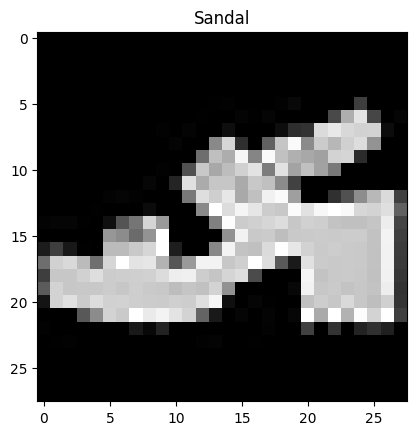

In [71]:
plt.imshow(test_sample[0].squeeze(),cmap="gray")
plt.title(class_name[test_label[0]])

In [72]:
pred=make_prediction(model=model,
                     data=test_sample)
pred[:2]

tensor([[1.6220e-07, 3.3332e-08, 6.5189e-08, 6.3789e-08, 1.2135e-08, 9.6602e-01,
         8.1150e-08, 7.0932e-05, 4.5556e-04, 3.3449e-02],
        [3.2256e-02, 7.3568e-01, 8.3759e-04, 2.1813e-01, 8.5768e-03, 7.0626e-05,
         3.5125e-03, 1.4421e-04, 7.8343e-04, 3.8647e-06]])

In [73]:
pred_class=pred.argmax(dim=1)
pred_class

tensor([5, 1, 7, 2, 3, 0, 4, 7, 1])

In [74]:
test_label

[5, 1, 7, 4, 3, 0, 4, 7, 1]

In [75]:
import matplotlib.pyplot as plt

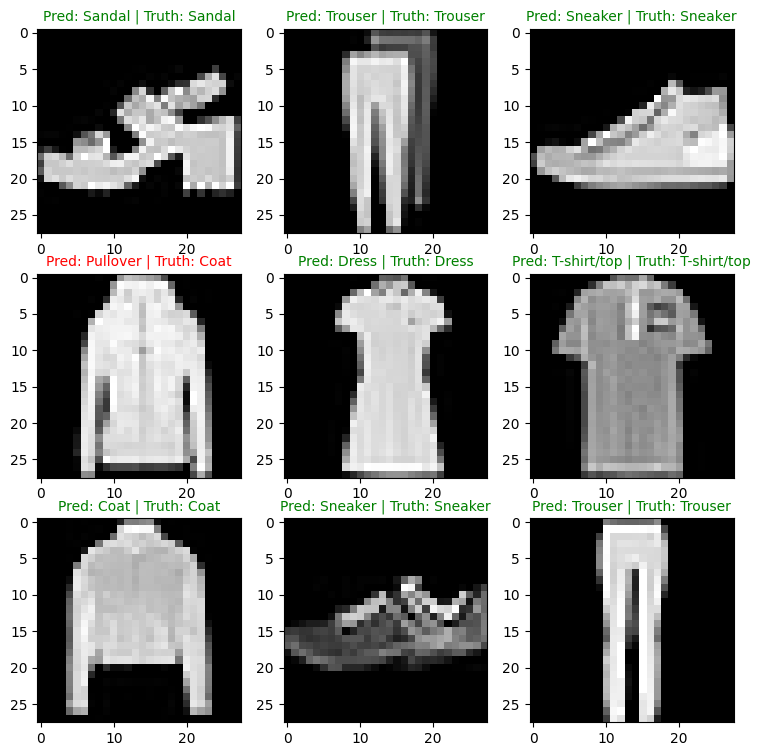

In [76]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_sample):
# Create subplot
     plt.subplot(nrows, ncols, i+1)

# Plot the target image
     plt.imshow(sample.squeeze(), cmap="gray")

# Find the prediction (in text form, e.g "Sandal")
     pred_label = class_name[pred_class[i]]

# Get the truth label (in text form)
     truth_label = class_name[test_label[i]]

# Create a title for the plot
     title_text = f"Pred: {pred_label} | Truth: {truth_label}"

# Check for equality between pred and truth and change color of title text
     if pred_label == truth_label:
        plt.title(title_text, fontsize=10,c="g") # green text if prediction same as truth
     else:
         plt.title(title_text, fontsize=10, c="r")

In [78]:
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model.eval()
with torch.inference_mode():
    for x, y in tqdm(test_dataLoader, desc="Making predictions ... ") :
# Send the data and targets to target device
        x, y = x.to(device), y.to(device)
# Do the forward pass
        y_logit = model(x)
# Turn predictions from logits -> prediction probabilities -> prediction labels
        y_pred = torch.softmax(y_logit.squeeze(), dim=0) . argmax(dim=1)
# Put prediction on CPU for evaluation
        y_preds. append(y_pred.cpu( ))

# Concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions ... :   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [83]:
!pip install torchmetrics mlxtend -U


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 882.6 kB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.4 MB 882.6 kB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.4 MB 882.6 kB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.4 MB 532.8 kB/s eta 0:00:02
   ----------------------- ---------------- 0.8/1.4 MB 532.8 kB/s eta 0:00:02
   ------------------------------- -------- 1.0/1.4 MB 613.9 kB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.4 MB 613.9 kB/s eta 0:00:01
   -------------------------------------

In [84]:
# See if required packages are installed and if not, install them ...
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend .__version__}")
    assert int(mlxtend .__version__. split(".") [1] >= 19, "mlxtend version should be 0.19.0 or higher")
except:
    !pip install techmetrics -U mlxtend
    import torchmetrics, mlxtend
    print (f"mlxteru version: {mlxtend .__version__}")

mlxtend version: 0.23.4
mlxteru version: 0.23.4


ERROR: Could not find a version that satisfies the requirement techmetrics (from versions: none)
ERROR: No matching distribution found for techmetrics


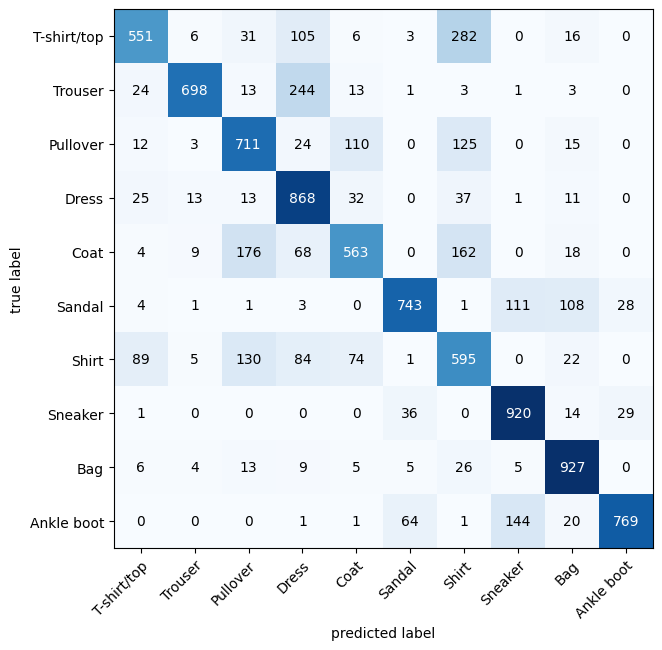

In [87]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task="multiclass",num_classes=len(class_name))
confmat_tensor = confmat(preds=y_pred_tensor,
target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
conf_mat=confmat_tensor.numpy(), # matplotlib likes working with munpy
class_names=class_name,
figsize=(10, 7))

### Saving model

In [88]:
from pathlib import Path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)
MODEL_NAME="PytTorch_CNN_model.pth"
SAVE_MODEL_PATH=MODEL_PATH/MODEL_NAME
SAVE_MODEL_PATH

WindowsPath('models/PytTorch_CNN_model.pth')

In [89]:
torch.save(obj=model.state_dict(),
           f=SAVE_MODEL_PATH)

In [ ]:
torch.manual_seed(42)

loaded_model_2 = FashionMnist(input_shape=1,
hidden_units=10,
output_shape=len(class_name))
s
loaded_model_2.load_state_dict(torch.load(f=SAVE_MODEL_PATH) )

# Send the model to the target device
loaded_model_2.to(device)

C:\Users\thish\AppData\Local\Temp\ipykernel_18556\438859643.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f=SAVE_MODEL_PATH) 

FashionMnist(
  (Conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)